Amit Chen

In [ ]:
#%%


import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn import metrics
from matplotlib.patches import Rectangle

# read the file:
PARTY_NAMES = ["טב", "ל", "מחל", "שס", "ג", "פה", "אמת", "ודעם"][::-1]
dict={"פה":"כחול לבן","ג":"יהדות התורה", "שס":"שס","מחל":"ליכוד","ל":"ישראל ביתנו","טב":"ימינה","אמת":"עבודה גשר מרץ","ודעם":"הרשימה המשותפת"}

Q2_FLAG = True
df_2020_raw = pd.read_csv("/content/expb.csv",
                          encoding='iso-8859-8',
                          index_col='שם ישוב')
# clear the data
df_2020_raw = df_2020_raw.drop('מעטפות חיצוניות', axis=0)
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1)  # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[9:]]
df_2020_raw.drop("זץ", axis=1)
df_2020.drop("זץ", axis=1)

In [3]:

# delete the small parties:
def create_q_vector(df, thresh=0.0325):
    df = df[PARTY_NAMES]
    return df  # the biggest 8 of the list


    
    
# read the file:
PARTY_NAMES = ["טב", "ל", "מחל", "שס", "ג", "פה", "אמת", "ודעם"][::-1]

Q2_FLAG = True
df_2020_raw = pd.read_csv("/content/expb.csv",
                          encoding='iso-8859-8',
                          index_col='שם ישוב')
# clear the data
df_2020_raw = df_2020_raw.drop('מעטפות חיצוניות', axis=0)
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1)  # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[9:]]
df_2020_raw.drop("זץ", axis=1)
df_2020.drop("זץ", axis=1)



,אמת,ג,ודעם,ז,זך,טב,י,יז,ינ,יף,יק,יר,כ,כן,ל,מחל,נ,נז,ני,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 41
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,2,0,112,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0,0,0,2,NaN
אבו גווייעד שבט,6,0,235,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,2,0,NaN
אבו גווייעד שבט,5,0,207,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,2,1,0,0,0,0,0,0,NaN
אבו גוש,15,1,229,0,0,0,0,0,1,0,0,1,0,0,0,32,0,0,0,0,0,11,0,0,0,0,0,0,2,NaN
אבו גוש,6,0,330,0,0,0,0,0,2,0,0,0,0,0,2,23,0,0,0,0,0,18,0,0,0,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
תקוע,10,14,2,3,0,174,0,0,0,0,0,0,1,1,15,227,0,0,0,9,0,27,0,0,0,0,1,0,11,NaN
תקוע,7,8,0,1,0,301,0,0,0,0,0,0,0,0,10,188,2,0,0,9,0,25,1,0,1,0,1,4,13,NaN
תראבין אצאנע שבט,0,0,43,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,NaN


Questions 1 and 2 are below :


In [14]:

def question_one(potential_voters_per_kalpi, prob_to_vote):
    """
    :param potential_voters_per_kalpi: N tilda (10631,8)
    :param prob_to_vote: prob of get vote in this kalpi (10631,8)
    :return:
    """
    n_i_j = np.random.binomial(np.array(potential_voters_per_kalpi,dtype=np.int32), (prob_to_vote))
    return np.round(n_i_j)


def question_two(data_frame_raw: pd.DataFrame, data_frame: pd.DataFrame):
    """
    :param data_frame: our df
    :return:
    """

    n_tilda, v1 = create_v1(data_frame,data_frame_raw)


    # part 2.B - score_vector:
    score_vector = np.array([0.5, 0.4, 0.7, 0.8, 0.9, 0.6, 0.3, 0.2])
    # we chose each prob to party by our knowledge of the political situation
    big_matrix_of_ones = np.ones((1, 10631))
    v2 = (score_vector.reshape((8, 1))) @ big_matrix_of_ones
    v2 = v2.T

    # part 2.C - random_vector on each city:
    # create matrix of (1213,8) that each row is permutation of 0.2 until 0.9
    number_of_cities = 1213
    matrix = np.zeros(shape=(number_of_cities, 8)) + score_vector
    array = np.apply_along_axis(arr=matrix, axis=1, func1d=np.random.permutation)
    # print(array)

    # create dictionary that matches each random_vector to a city
    names_of_cities = set(list(data_frame.index))
    # print(names_of_cities)
    mat_of_permutation = pd.DataFrame(array, index=names_of_cities)  # matrix of cities and vectors
    mat_of_permutation_trans = mat_of_permutation.T
    n_tilda_trans = n_tilda.T

    lista = []

    run_to = df_2020_raw.index
    run_to = run_to.drop_duplicates()  # each city in israel
    # print(mat_of_permutation_trans.shape)
    # print(n_tilda_trans.shape)
    # print(len(run_to))
    for name in run_to:
        mat_np_trans = np.array(mat_of_permutation_trans[name]).reshape((8, 1))  # random vector after permutation
        calc_np_trans = np.array(n_tilda_trans[name])  # num of votes for each party from some city

        if calc_np_trans.shape == (8,):  # If a row vector is returned broadcasting will create a matrix instead of vec.
            shape_calc = np.zeros_like(calc_np_trans)  # create matrix os zero's like calc_np_trans
            shape_calc = shape_calc.reshape((8, 1))
            shape_calc = shape_calc + mat_np_trans
            lista.append(shape_calc.T)
            continue

        shape_calc = np.zeros_like(calc_np_trans)  # create matrix os zero's like calc_np_trans
        calc_np_trans = shape_calc + mat_np_trans  # add to each raw the vector
        lista.append(calc_np_trans.T)  # append to list after Transpose

    tuple_of_lista = np.vstack(tuple(lista))
    v3 = pd.DataFrame(tuple_of_lista, index=n_tilda.index, columns=n_tilda.columns)
    # print(final.T['כפר חיטים'].shape)
    # and so far we create V_i

    return v1, v2, np.array(v3)


def create_v1(data_frame, data_frame_raw):
    n_tilda = data_frame * (data_frame_raw['בזב'].sum() / data_frame_raw['כשרים'].sum())  # calc like we asked to
    n_tilda = n_tilda.round()  # round it
    div = (data_frame_raw['כשרים'] / data_frame_raw['בזב'])
    trans = (np.array(div)).reshape(10631, 1)  # transpose to vector
    matrix_of_ones = np.ones((1, 8))
    v1 = trans @ matrix_of_ones  # ( (10631, 1) * (1,8) -> (10631,8))
    return n_tilda, v1

A function for creating a comparsion between the distribtuion under different Vij matrices.

In [11]:
from matplotlib import pyplot as plt
def party_bar(pj, qj_hat, true_qj, title='' , xlabel='' , ylabel='' , names=[],vtype=""):
    width = 0.3  # set column width
    fig, ax = plt.subplots()  # plt.subplots()

    pj_bar = ax.bar(np.arange(8), list(pj), width, color='b',align='center', alpha=0.5, ecolor='black', capsize=10)
    qj_hat_bar=ax.bar(np.arange(8)+width+width, list(qj_hat), width, color='g',align='center', alpha=0.5, ecolor='black', capsize=10)
    p_bar = ax.bar(np.arange(8)+width, list(true_qj), width, color='r')
    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Comparing the voting  precentage per parties\n between the simulation , true distribtion and the estimator\n for the true distribution , under the vector : '+vtype   )
    ax.set_xticks(np.arange(len(names)))
    rev_names = [name[::-1] for name in list(names)]
    long_names=[]
    for name in rev_names:
        long_names.append(dict[name[::-1]][::-1])

    ax.set_xticklabels(long_names,rotation=45)
    dummy_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    dummy_2 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    ax.legend((pj_bar[0], qj_hat_bar[0],p_bar[0]), ("p","q hat", "q"))
    plt.show()
    return fig, ax

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


  Vi is the active vote percentage  in ballot i  in the original data

measurement  table is the following : 
                    ודעם            אמת              פה              ג  \
Mean     0.137811117283  0.057021868079 0.261461235292  0.057072683389   
Variance 0.000000011233  0.000000004711 0.000000015568  0.000000004305   
Bias     -0.000266765887 0.000443488752 -0.000696364860 0.000311416828   
MSE      0.000000082397  0.000000201394 0.000000500492  0.000000101285   

                     שס             מחל              ל             טב  
Mean     0.076103254320 0.299162179184  0.064506985886 0.046860676566  
Variance 0.000000006567 0.000000019376  0.000000006308 0.000000003307  
Bias     0.000315710541 -0.000896718333 0.000332658551 0.000456574408  
MSE      0.000000106240 0.000000823479  0.000000116969 0.000000211768  

The order of the table got mixed up since hebrew and printing format and collab with \n , and we didn't know how to fix it.
  Every party  is assigned  a diff

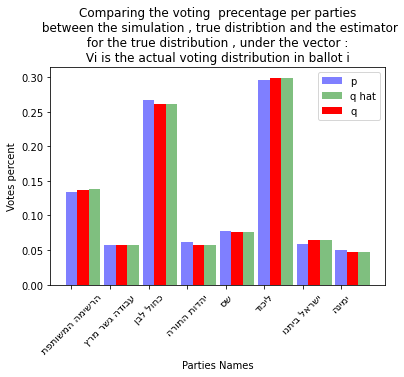

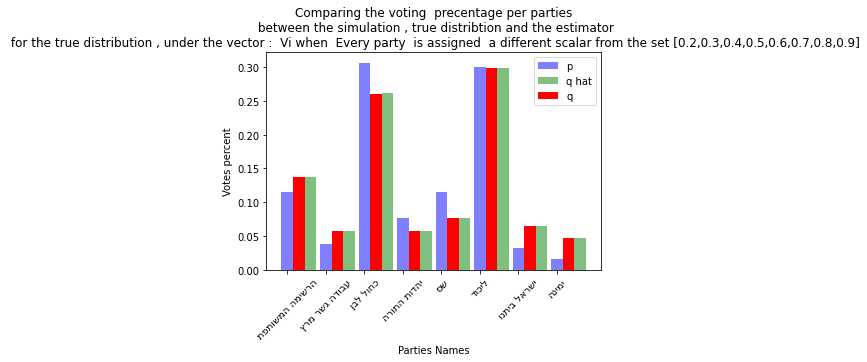

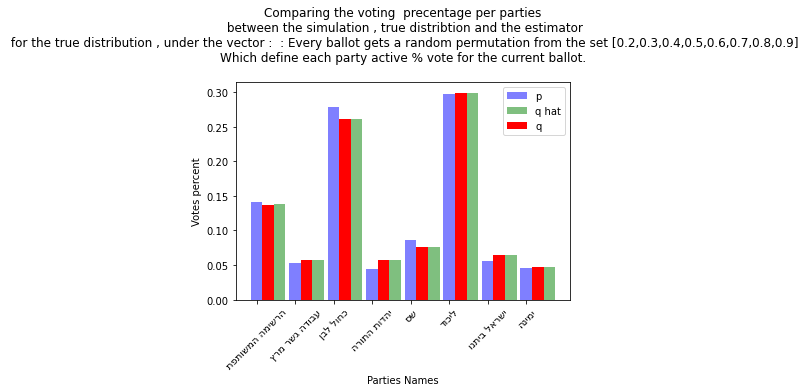

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5ecc828550>)

In [49]:




def create_measurment_table(qj_v1, true_qj, qjs_sim,Vi,Q2=False):
    all_qjs_sim1_pd = pd.DataFrame(qjs_sim)
    np.set_printoptions(precision=10)
    qjs_pred_var = all_qjs_sim1_pd.var()
    qjs_pred_mean = np.array(all_qjs_sim1_pd.mean(axis=0))
    bias_qj_pred = (true_qj - qjs_pred_mean)
    
    k=3 
    mse_pred_qj = qjs_pred_var + np.array(np.square(bias_qj_pred))
    #We reversed the name again since the print became in the wrong order beacuse the printing format ,
    # in case its different on your run , please
    names = ["טב", "ל", "מחל", "שס", "ג", "פה", "אמת", "ודעם"][::-1]


    if Q2:
        names = ["טב : 0.5","ל : 0.4", "מחל 0.7", "שס : 0.8", "ג : 0.9", "פה : 0.6", "אמת :0.3  ", "ודעם :0.2 "]
    measure_table = np.vstack([qjs_pred_mean, qjs_pred_var, bias_qj_pred, mse_pred_qj])
    measure_table_pd = pd.DataFrame(measure_table, index=["Mean", "Variance", "Bias", "MSE"], columns=names)
    pd.options.display.float_format = '{:,.12f}'.format
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', -1)
    
    print(Vi +"\nmeasurement  table is the following : ",sep="")
    print(measure_table_pd,sep="")
    print("")


    

# part 2.D
def simulation_Q1(df_raw, df):
    # simulation on Lab_2:

    scale_up = (df_raw["בזב"] / df_raw["כשרים"])

    ones_vector = np.ones((8, 1))  # create array of [8,1]
    new_scale = scale_up.values.reshape((1, 10631))  # we get matrix of 29 x 1213
    mult = ones_vector @ new_scale  # matrix mult
    new = mult.T * df  # by value
    return new


q_vector_df_raw_2020 = df_2020_raw[["טב", "ל", "מחל", "שס", "ג", "פה", "אמת", "ודעם", "כשרים", "בזב"][::-1]]
q_vector_df_2020 = df_2020[PARTY_NAMES]
np.set_printoptions(precision=3)



    
v1, v2, v3 = question_two(q_vector_df_raw_2020, q_vector_df_2020)

df = simulation_Q1(q_vector_df_raw_2020, q_vector_df_2020)
true_qj=df.sum(axis=0)/df.sum().sum()
simulation_1_sum = []
simulation_2_sum = []
simulation_3_sum = []
sim_1_sum=pd.DataFrame(np.zeros((10631,8)))
sim_2_sum=pd.DataFrame(np.zeros((10631,8)))
sim_3_sum=pd.DataFrame(np.zeros((10631,8)))

qjs_sim1=[]
qjs_sim2=[]
qjs_sim3=[]



supports_v1=pd.DataFrame(np.zeros((10631,8)))
supports_v2=pd.DataFrame(np.zeros((10631,8)))
supports_v3=pd.DataFrame(np.zeros((10631,8)))

for i in range(0, 500):
    sim_v1_cur=question_one(df, v1)
    sim_v2_cur=question_one(df, v2)
    sim_v3_cur=question_one(df, v3)

    sim_v1_sup = (sim_v1_cur) / v1 # supporters
    sim_v2_sup = (sim_v2_cur) / v2
    sim_v3_sup = (sim_v3_cur) / v3

    supports_v1+=(sim_v1_sup)
    supports_v2+=(sim_v2_sup)
    supports_v3+=(sim_v3_sup)

    sim_1_sum+=sim_v1_cur
    sim_2_sum+=sim_v2_cur
    sim_3_sum+=sim_v3_cur

    qjs_sim1.append(sim_v1_sup.sum(axis=0)/sim_v1_sup.sum().sum())
    qjs_sim2.append(sim_v2_sup.sum(axis=0)/sim_v2_sup.sum().sum())
    qjs_sim3.append(sim_v3_sup.sum(axis=0)/sim_v3_sup.sum().sum())
    simulation_1_sum.append(sim_v1_cur.sum(axis=0)/sim_v1_sup.sum().sum())
    simulation_2_sum.append(sim_v2_cur.sum(axis=0)/sim_v2_sup.sum().sum())
    simulation_3_sum.append(sim_v3_cur.sum(axis=0)/sim_v3_sup.sum().sum())


#Prep variables for bar plot

pj_v1=((sim_1_sum/500).sum(axis=0)/(sim_1_sum/500).sum().sum())
pj_v2=((sim_2_sum/500).sum(axis=0)/(sim_2_sum/500).sum().sum())
pj_v3=((sim_3_sum/500).sum(axis=0)/(sim_3_sum/500).sum().sum())

qj_hat_v1=((supports_v1/500).sum(axis=0)/(supports_v1/500).sum().sum())
qj_hat_v2=((supports_v2/500).sum(axis=0)/(supports_v2/500).sum().sum())
qj_hat_v3=((supports_v3/500).sum(axis=0)/(supports_v3/500).sum().sum())


simulation_1_sum=pd.DataFrame(simulation_1_sum)
simulation_2_sum= pd.DataFrame(simulation_2_sum)
simulation_3_sum= pd.DataFrame(simulation_3_sum)

qj_1_mean=np.array(qjs_sim1).mean(axis=0)
qj_2_mean=np.array(qjs_sim2).mean(axis=0)
qj_3_mean=np.array(qjs_sim3).mean(axis=0)

qj1_var_sim=pd.DataFrame(qjs_sim1).std()
qjs2_var_sim=pd.DataFrame(qjs_sim2).std()
qjs3_var_sim=pd.DataFrame(qjs_sim3).std()

np.array(qjs_sim1).var()
p1_var=simulation_1_sum.std()
p2_var=simulation_2_sum.std()
p3_var=simulation_3_sum.std()

p1 = (simulation_1_sum).sum(axis=0) / simulation_1_sum.sum().sum()
p2=(simulation_2_sum).sum(axis=0)/simulation_2_sum.sum().sum()
p3=(simulation_3_sum).sum(axis=0)/simulation_3_sum.sum().sum()

# q1_hat=np.array(qjs_sim1).mean(axis=0)
# q2_hat=np.array(qjs_sim2).mean(axis=0)
# q3_hat=np.array(qjs_sim3).mean(axis=0)

qj_var_v1=(pd.DataFrame(qjs_sim1)).std()
qj_mean_v1=(pd.DataFrame(qjs_sim1)).mean()

qj_var_v2=(pd.DataFrame(qjs_sim2)).std()
qj_mean_v2=(pd.DataFrame(qjs_sim2)).mean()

qj_var_v3=(pd.DataFrame(qjs_sim3)).std()
qj_mean_v3=(pd.DataFrame(qjs_sim3)).mean()


pj_var_v1=(pd.DataFrame(simulation_1_sum)).std()
pj_mean_v1=(pd.DataFrame(simulation_1_sum)).mean()

pj_var_v2=(pd.DataFrame(simulation_2_sum)).std()
pj_mean_v2=(pd.DataFrame(simulation_2_sum)).mean()

pj_var_v3=(pd.DataFrame(simulation_3_sum)).std()
pj_mean_v3=(pd.DataFrame(simulation_3_sum)).mean()



create_measurment_table(pj_v1,true_qj,qjs_sim1[::-1],"  Vi is the active vote percentage  in ballot i  in the original data\n")
print("The order of the table got mixed up since hebrew and printing format and collab with \\n , and we didn't know how to fix it.")
create_measurment_table(pj_v2, true_qj,qjs_sim2,"  Every party  is assigned  a different scalar"
                                          " from the set [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]"
                                          "\nand that will define its active vote % over all the ballots.\n", Q2_FLAG)
print("The order of the table got mixed up since hebrew and printing format and collab with \\n , and we didn't know how to fix it.")

create_measurment_table(pj_v3, true_qj,qjs_sim3," Every ballot gets a random permutation from the set [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]\n"
                                          "Which define each party active % vote for the current ballot.\n")
print("The order of the table got mixed up since hebrew and printing format and collab with \\n , and we didn't know how to fix it.")





party_bar(pj_v1,qj_hat_v1,true_qj,names=PARTY_NAMES , vtype="\n Vi is the actual voting distribution in ballot i ")
party_bar(pj_v2,qj_hat_v2,true_qj,names=PARTY_NAMES , vtype=" Vi when  Every party  is assigned  a different scalar"
                                          " from the set [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]")
party_bar(pj_v3,qj_hat_v3,true_qj,names=PARTY_NAMES , vtype=" : Every ballot gets a random permutation from the set [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]\n"
                                          "Which define each party active % vote for the current ballot.\n")



#The order of the table got mixed up since the printing format in google collab
# Combined with hebrew results in a buggy table , the values are as
# follows : 

2.3 מסקנות תיקון א: תיקון א של בעלי זכות בחירה חלקי כשרים ראינו בשבוע בו תוצאה דיי טובה ומהווה עבורנו נקודת ייחוס, אפשר לראות שהממוצע שלו קרוב מאוד(כמצופה),

 תיקון ב: השונות של שס ירדה משעמעותית  בפכולה של 3 בערך , והשונות של שס עלתה בכפולה של 5 , השונות של מחל גדלה  פי 5 , השונות של  אמת הוכפלה כמעט ב 2 , השונות של פה הוכפלה כמעט פי 2 , השונות של ג' הוכפלה גם היא פי 2 וחצי. אז ניתן להסיק כי השונות נהיית פחות קרובה לשונות האמיתית עקב כך שאנו דוגמים ויוצרים סימולציות ולכן זה מקרב  בלבד את הפרמטרים האמייתים של ההתפלגות  בנוגע לשונות , הממוצע נשאר כמעט זהה עד כדי שגיאה אפסית ולכן הוא אכן מקרב את פרמטר הממוצע.
 כעת נובע מכך גם שתגדל הטעות הריבועית ממוצעת במפלגות בהן השונות גדלה , ותקטן במפלגות בהן השונות קטנה מכיוון שהטעות הריבועית הממוצעת הינה מורכבת מהשונות , ולכן ייגדל וייקטן בהתאם , חשוב לציין כי הההבדל בין ההטיות הינו זניח ולכן ההגדלה וההקטנה תקבע רק ע"י השונות.
 
 תיקון ג : ניתן לראות כי יחסית לנקודת ייחוס שלנו השונות של כולם גדלה באופן חד משמעי בזמן שההפרש בין ההטיות נשאר זניח , ולכן הטעות הריבועית הממוצעת  הינה גדלה עקב ההפרש בין השוניות.

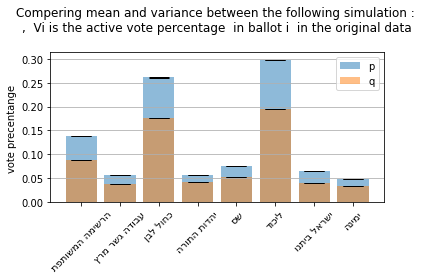

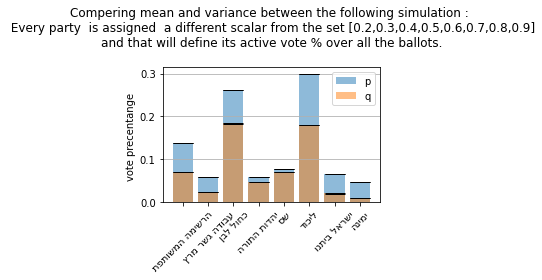

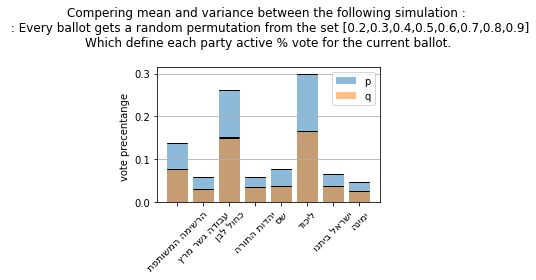

In [47]:
from  matplotlib import pyplot as plt
means_pj=[pj_mean_v1,pj_mean_v2,pj_mean_v3]
vars_pj = [pj_var_v1,pj_var_v2,pj_var_v3]

means_qj=[qj_mean_v1,qj_mean_v2,qj_mean_v3]
vars_qj=[qj_var_v1,qj_var_v2,qj_var_v3]

def plot_bars_means(qj_mean_v1,qj_var_v1,pj_mean_v1,pj_var_v1 , simu_kind=""):
  x_pos=np.arange(8)
  fig, ax = plt.subplots()
  bar_qj=ax.bar(np.arange(8), np.array(qj_mean_v1), yerr=np.array(qj_var_v1), align='center', alpha=0.5, ecolor='black', capsize=10)
  bar_pj=ax.bar(np.arange(8), np.array(pj_mean_v1), yerr=np.array(pj_var_v1), align='center', alpha=0.5, ecolor='black', capsize=10)
  ax.set_title('Compering mean and variance between the following simulation : '+ simu_kind)
  ax.set_xticks(x_pos)
  names=PARTY_NAMES
  rev_names = [name[::-1] for name in list(names)]
  long_names=[]
  for name in rev_names:
      long_names.append(dict[name[::-1]][::-1])
  ax.set_xticklabels(long_names,rotation=45)
  ax.set_ylabel('vote precentange ')

  ax.yaxis.grid(True)
  dummy_1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
  dummy_2 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
  ax.legend((bar_qj[0], bar_pj[0]), ("p","q"))

  # Save the figure and show
  plt.tight_layout()
  plt.savefig('bar_plot_with_error_bars.png')
  plt.show()

stim_names=["\n,  Vi is the active vote percentage  in ballot i  in the original data\n","\n Every party  is assigned  a different scalar"
                                          " from the set [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]"
                                          "\nand that will define its active vote % over all the ballots.\n","\n : Every ballot gets a random permutation from the set [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]\n"
                                          "Which define each party active % vote for the current ballot.\n"]
for i in range(3):
  plot_bars_means(means_qj[i],vars_qj[i],means_pj[i],vars_qj[i] , stim_names[i])